# basic syntax

In [ ]:
""" Learn a bit of new knowledge everyday
    The best investment in the world is the investment of yourself.
"""

In [1]:
# Fibonacci
a, b = 1, 1
while b < 100:
    a, b = b, a + b
    print(a, b)
    


1 2
2 3
3 5
5 8
8 13
13 21
21 34
34 55
55 89
89 144


In [7]:
# function Fibonacci
def fibonacci(n): 
    result = []
    a, b = 1, 1
    while b < n:
        result.append(a)
        a, b = b, a + b
    return result

print(fibonacci(1000))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]


In [43]:
# List
# __init__ 
def print_list(input_list):
    for item in input_list:
        print item, 
    print "\n"

list_of_integer = range(-5, 5)
print "__init__"
print_list(list_of_integer)
    
# append
print "append(x)"
list_of_integer.append(5)
print_list(list_of_integer)
    
# pop 
print "pop() or pop(i): "
list_of_integer.pop(0)
print_list(list_of_integer)

# remove
print "remove(x)"
list_of_integer.remove(1)
print_list(list_of_integer)

# index(x)
print "index(x)"
x = 1
index_of_x = list_of_integer.index(x-1)
print_list(list_of_integer)

# insert(i, x)
print "insert(i, x)"
list_of_integer.insert(index_of_x + 1, x)
print_list(list_of_integer)

# count(x)
print "count(x)"
print "count(", x ,") = ", list_of_integer.count(x)

# reverse()
list_of_integer.reverse()
print_list(list_of_integer)



__init__
-5 -4 -3 -2 -1 0 1 2 3 4 

append(x)
-5 -4 -3 -2 -1 0 1 2 3 4 5 

pop() or pop(i): 
-4 -3 -2 -1 0 1 2 3 4 5 

remove(x)
-4 -3 -2 -1 0 2 3 4 5 

index(x)
-4 -3 -2 -1 0 2 3 4 5 

insert(i, x)
-4 -3 -2 -1 0 1 2 3 4 5 

count(x)
count( 1 ) =  1
5 4 3 2 1 0 -1 -2 -3 -4 



In [47]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))
print sigmoid(-0.02)
print sigmoid(0.1*0.495)
print (1-0.512)*0.512*(1-0.512)

0.49500016666
0.512372473799
0.121929728


In [ ]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate error
error = target - output

# TODO: Calculate error gradient for output layer
del_err_output = error*output*(1 - output)

# TODO: Calculate error gradient for hidden layer
del_err_hidden = np.dot(del_err_output, weights_hidden_output) * \
                 hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * del_err_output * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * del_err_hidden * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)

In [ ]:
# Backpropogation
import numpy as np
from data_prep import features, targets, features_test, targets_test

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 900
learnrate = 0.005

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)

        output = sigmoid(np.dot(hidden_output,
                                weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate error gradient in output unit
        output_error = error * output * (1 - output)

        # TODO: propagate errors to hidden layer
        hidden_error = np.dot(output_error, weights_hidden_output) * \
                       hidden_output * (1 - hidden_output)

        # TODO: Update the change in weights
        del_w_hidden_output += output_error * hidden_output
        del_w_input_hidden += hidden_error * x[:, None]

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


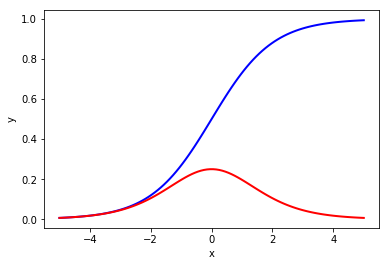

In [15]:
# sigmoid function
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
def sigmoid(x):
        return 1/(1+np.exp(-x))

x = np.linspace(-5, 5, 100)
y = sigmoid(x)
y_diff = y*(1-y)
h1 = plt.plot(x, y, 'b-', linewidth=2)
h2 = plt.plot(x, y_diff, 'r-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [1]:
# input 
value_int = input("value_int = ")
print("value_int = ", value_int)

value_int = 10
value_int =  10


In [ ]:
# stack
class NeuralNetwork(object):

    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = lambda x: 1 / (1 + np.exp(-x))

NeuralNetwork()

In [148]:
# numpy quickstart
import numpy as np 


arr1 = np.arange(10).reshape(2, 5)
arr2 = arr1.T
print "arr1 = ", arr1
print "arr2 = ", arr2

print "ndim = ", arr1.ndim
print "ndim = ", arr2.ndim

print "arr1.shape = ", arr1.shape
print "arr2.shape = ", arr2.shape

print "arr1.size = ", arr1.size
print "arr2.size = ", arr2.size

print "arr1.itemsize = ", arr1.itemsize
print "arr2.itemsize = ", arr2.itemsize

print "arr1.dtype = ", arr1.dtype
print "arr2.dtype = ", arr2.dtype

print "arr1*arr2 = ", np.dot(arr1, arr2)


arr3 = np.array([1, 2, 3, 4])
arr4 = arr3.T
print "arr3.shape = ", arr3.shape
print "arr4.shape = ", arr4.shape

print "arr3[:, None].shape = ", arr3[None, :].shape
print "arr4[:, None].shape = ", arr4[:, None].shape



zero_arr = np.zeros((3, 4), dtype=np.int16)
print zero_arr


empty_arr = np.empty((4, 3))
print empty_arr
print empty_arr.shape
print empty_arr.T.shape

# linspace 
linear_arr = np.linspace(0, 10, 101, dtype=float)
print linear_arr

# reshape 
reshape_arr = np.arange(10000).reshape(100, 100)
np.set_printoptions(threshold='nan')
print "reshape_arr = ", reshape_arr
print "reshape_arr.shape = ", reshape_arr.shape
print "reshape_arr.T = ", reshape_arr.T
print "reshape_arr.T.shape = ", reshape_arr.T.shape

arr1 =  [[0 1 2 3 4]
 [5 6 7 8 9]]
arr2 =  [[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
ndim =  2
ndim =  2
arr1.shape =  (2, 5)
arr2.shape =  (5, 2)
arr1.size =  10
arr2.size =  10
arr1.itemsize =  8
arr2.itemsize =  8
arr1.dtype =  int64
arr2.dtype =  int64
arr1*arr2 =  [[ 30  80]
 [ 80 255]]
arr3.shape =  (4,)
arr4.shape =  (4,)
arr3[:, None].shape =  (1, 4)
arr4[:, None].shape =  (4, 1)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
(4, 3)
(3, 4)
[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2  

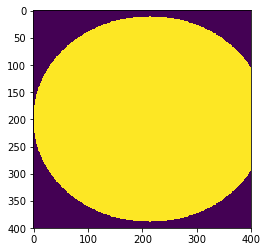

In [161]:
# basic operations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
        return divtime
    
plt.imshow(mandelbrot(400,400))
plt.show()

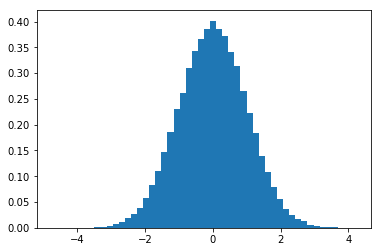

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
mu, sigma = 0, 1
v = np.random.normal(mu,sigma,100000)
plt.hist(v, bins=50, normed=1.0)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
    
N = 10
array_ones = np.arange(N*N).reshape(N, N)

print(array_ones)
print("array shape = ", array_ones.shape)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
array shape =  (10, 10)


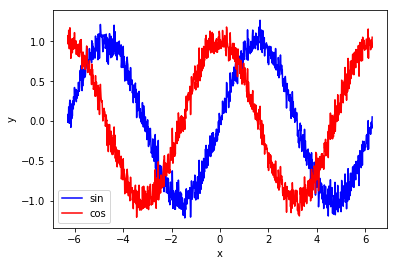

In [49]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
N = 1000
x = np.linspace(-2*np.pi,2* np.pi, N)
mu, sigma = 0, 0.1
random_error = np.random.normal(mu, sigma, N)
y_sin = np.sin(x) + random_error
y_cos = np.cos(x) + random_error
plot_sin, = plt.plot(x, y_sin, color='b', label='sin')
plot_cos, = plt.plot(x, y_cos, color='r', label='cos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles = [plot_sin, plot_cos])
plt.show()

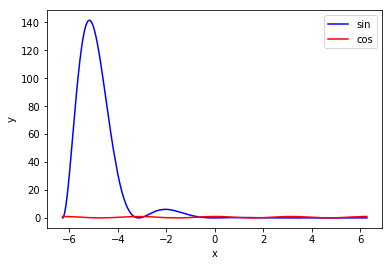

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
N = 1000
x = np.linspace(-2*np.pi,2* np.pi, N)
mu, sigma = 0, 0.1
random_error = np.random.normal(mu, sigma, N)
y_sin = (np.sin(x))**2 *np.exp(-x)+ random_error**2
y_cos = (np.cos(x))**2 + random_error**2
plot_sin, = plt.plot(x, y_sin, color='b', label='sin')
plot_cos, = plt.plot(x, y_cos, color='r', label='cos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles = [plot_sin, plot_cos])
plt.show()

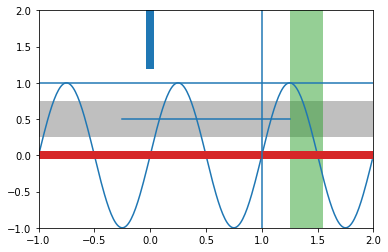

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-1, 2, .01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
# draw a thick red hline at y=0 that spans the xrange
l = plt.axhline(linewidth=8, color='#d62728')

# draw a default hline at y=1 that spans the xrange
l = plt.axhline(y=1)

# draw a default vline at x=1 that spans the yrange
l = plt.axvline(x=1)

# draw a thick blue vline at x=0 that spans the upper quadrant of
# the yrange
l = plt.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')

# draw a default hline at y=.5 that spans the middle half of
# the axes
l = plt.axhline(y=.5, xmin=0.25, xmax=0.75)

p = plt.axhspan(0.25, 0.75, facecolor='0.5', alpha=0.5)

p = plt.axvspan(1.25, 1.55, facecolor='#2ca02c', alpha=0.5)

plt.axis([-1, 2, -1, 2])


plt.show()

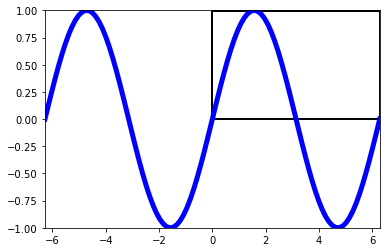

In [47]:
import numpy as np 
import  matplotlib.pyplot as plt

x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)

plt.axhline(y=0, xmin=0.5, color='k', linestyle='-', linewidth=2)
plt.axhline(y=0.99, xmin=0.5, xmax=1.0, color='k', linestyle='-', linewidth=2)
plt.axvline(x=0, ymin=0.5, color='k', linestyle='-', linewidth=2)
plt.axvline(x=2*np.pi, ymin=0.5, ymax=1.00, color='k', linestyle='-', linewidth=2)
plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-1, 1])
plt.box(True)
plt.plot(x, y, color='b', linestyle='-', linewidth=5)
plt.show()

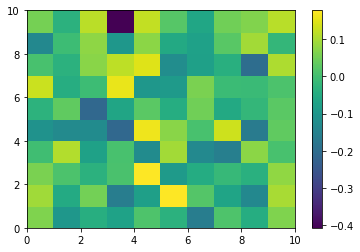

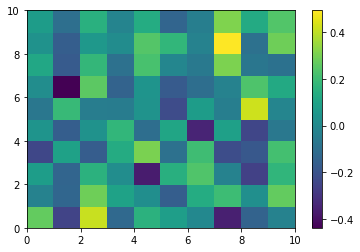

In [60]:
# create random matrix and plot them on a color map
import numpy as np
import matplotlib.pyplot as plt
mu, sigma = 0, 0.1
random_matrix = np.random.normal(mu, sigma, 100).reshape(10, 10)
fig1 = plt.figure()
pcolor(random_matrix)
colorbar()

fig2 = plt.figure()
mu, sigma = 0, 0.2
random_matrix = np.random.normal(mu, sigma, 100).reshape(10, 10)
pcolor(random_matrix)
colorbar()